<a href="https://colab.research.google.com/github/Nyabokelean/Predicting_Electricity_consumption/blob/master/Energy_In_Uganda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Understanding

## Data Understanding

In [ ]:
!pip install bar_chart_race

In [ ]:
!pip install bar_chart_race

In [ ]:
# Import necessary libraries.
#
import pandas as pd
import numpy as np
import seaborn as sns
import plotly as pty
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import datetime

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from IPython.display import HTML
import calendar
from plotly.subplots import make_subplots

from plotly import graph_objects

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


## Loading the Dataset.

In [ ]:
# Load the dataset.
#
energy = pd.read_csv("Copy of train_6BJx641.csv")

In [ ]:
# Preview the top 5 rows.
#
energy.head()

ID             datetime  ...  var2  electricity_consumption
0   0  2013-07-01 00:00:00  ...     A                    216.0
1   1  2013-07-01 01:00:00  ...     A                    210.0
2   2  2013-07-01 02:00:00  ...     A                    225.0
3   3  2013-07-01 03:00:00  ...     A                    216.0
4   4  2013-07-01 04:00:00  ...     A                    222.0

[5 rows x 8 columns]

In [ ]:
# Preview bottom 5 rows.
#
energy.tail()

ID             datetime  ...  var2  electricity_consumption
26491  34891  2017-06-23 19:00:00  ...     A                    225.0
26492  34892  2017-06-23 20:00:00  ...     A                    213.0
26493  34893  2017-06-23 21:00:00  ...     A                    213.0
26494  34894  2017-06-23 22:00:00  ...     A                    210.0
26495  34895  2017-06-23 23:00:00  ...     A                    210.0

[5 rows x 8 columns]

> Our dataframe has about 26495 rows.
> Lets check for the size of the dataframe to confirm this.

In [ ]:
# Check the size of the dataframe.
#
energy.shape

(26496, 8)

> The dataframe has an actual size of 26496 Rows and 8 Columns.

## Data Cleaning

In [ ]:
# Check for null values.
#
energy.isna().sum()

ID                         0
datetime                   0
temperature                0
var1                       0
pressure                   0
windspeed                  0
var2                       0
electricity_consumption    0
dtype: int64

>>
The dataset does not have any null values. 

**Duplicated Values**

In [ ]:
# Check for Duplicates values.
#
energy.duplicated().sum()

0

>>
We also don't have duplicated variables in our dataset.

>>
We can now split the 'datetime' column into two columns.
>>
These columns are
>>
* Date
* Time

>>
The reason as to why we are splitting this column is due to the fact that we need to analyze how electricity consumption varies on an hourly basis. 


**Datetime**

In [ ]:
# Split the datatime column into two columns and add them to the dataframe.
# These two columns are: date and time.
#
d = pd.to_datetime(energy['datetime'], infer_datetime_format=True)
energy['date'] = d.dt.date
energy['time'] = d.dt.time
print (energy)

          ID             datetime  ...        date      time
0          0  2013-07-01 00:00:00  ...  2013-07-01  00:00:00
1          1  2013-07-01 01:00:00  ...  2013-07-01  01:00:00
2          2  2013-07-01 02:00:00  ...  2013-07-01  02:00:00
3          3  2013-07-01 03:00:00  ...  2013-07-01  03:00:00
4          4  2013-07-01 04:00:00  ...  2013-07-01  04:00:00
...      ...                  ...  ...         ...       ...
26491  34891  2017-06-23 19:00:00  ...  2017-06-23  19:00:00
26492  34892  2017-06-23 20:00:00  ...  2017-06-23  20:00:00
26493  34893  2017-06-23 21:00:00  ...  2017-06-23  21:00:00
26494  34894  2017-06-23 22:00:00  ...  2017-06-23  22:00:00
26495  34895  2017-06-23 23:00:00  ...  2017-06-23  23:00:00

[26496 rows x 10 columns]


In [ ]:
energy['time_hour'] = pd.to_datetime(energy['datetime']).dt.hour
energy.head()

ID             datetime  temperature  ...        date      time  time_hour
0   0  2013-07-01 00:00:00        -11.4  ...  2013-07-01  00:00:00          0
1   1  2013-07-01 01:00:00        -12.1  ...  2013-07-01  01:00:00          1
2   2  2013-07-01 02:00:00        -12.9  ...  2013-07-01  02:00:00          2
3   3  2013-07-01 03:00:00        -11.4  ...  2013-07-01  03:00:00          3
4   4  2013-07-01 04:00:00        -11.4  ...  2013-07-01  04:00:00          4

[5 rows x 11 columns]

In [ ]:
energy.describe()

ID   temperature  ...  electricity_consumption     time_hour
count  26496.000000  26496.000000  ...             26496.000000  26496.000000
mean   17455.500000      5.098989  ...               298.359601     11.500000
std    10122.873673      8.682860  ...               108.020555      6.922317
min        0.000000    -17.100000  ...               174.000000      0.000000
25%     8717.750000     -2.900000  ...               219.000000      5.750000
50%    17435.500000      6.400000  ...               267.000000     11.500000
75%    26177.250000     12.100000  ...               342.000000     17.250000
max    34895.000000     23.600000  ...              1386.000000     23.000000

[8 rows x 7 columns]

> We observe that during the seventh month of the year we have a spike in electricity consumption.
>>
During the month of January we see a slightly lower record of electricity consumption.

**Drop datetime column**

In [ ]:
# Check for the shape of the new dataframe.
#
energy.shape

(26496, 11)

**Export clean dataframe**

In [ ]:
energy.to_csv("Clean_Train_Dataset.csv")

In [ ]:
# Load The clean Dataset.
#
data = pd.read_csv("Clean_Train_Dataset.csv")
data.head()

Unnamed: 0  ID             datetime  ...        date      time  time_hour
0           0   0  2013-07-01 00:00:00  ...  2013-07-01  00:00:00          0
1           1   1  2013-07-01 01:00:00  ...  2013-07-01  01:00:00          1
2           2   2  2013-07-01 02:00:00  ...  2013-07-01  02:00:00          2
3           3   3  2013-07-01 03:00:00  ...  2013-07-01  03:00:00          3
4           4   4  2013-07-01 04:00:00  ...  2013-07-01  04:00:00          4

[5 rows x 12 columns]

In [ ]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)

**Numerical Dataframe**

In [ ]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numeric = data.select_dtypes(include=numerics)

**Categorical Dateframe**

In [ ]:
categorical = ['object']

category = data.select_dtypes(include=categorical)

**Checking fo outliers**

 Ourtliers:
 [[], [], [], [1021.0, 1021.0, 1021.0, 1024.0, 1023.0, 1022.0, 1023.0], [571.91, 575.04, 578.435, 582.58, 586.6, 53.235, 56.365, 59.87, 63.515, 67.41, 72.08, 76.35, 52.66, 59.435, 68.235, 77.425, 86.255, 95.96, 105.9, 114.09, 124.795, 130.82, 138.72, 147.285, 156.475, 165.79, 174.355, 184.185, 193.5, 201.675, 210.615, 219.32, 228.51, 236.435, 245.485, 253.3, 260.95, 268.1, 275.775, 283.825, 289.51, 296.445, 303.995, 309.165, 314.085, 319.005, 322.775, 327.17, 334.195, 343.135, 351.825, 360.89, 368.955, 379.02, 386.195, 393.345, 401.37, 407.645, 414.455, 419.375, 423.42, 426.175, 431.32, 434.45, 438.62, 443.015, 447.535, 56.115, 64.555, 75.26, 84.965, 94.795, 102.97, 112.3, 122.255, 139.745, 152.08, 161.535, 173.855, 184.91, 198.37, 210.69, 221.87, 231.075, 244.02, 251.695, 257.38, 262.025, 269.95, 278.265, 286.955, 296.395, 305.71, 313.9, 322.825, 328.975, 336.375, 342.685, 346.73, 352.775, 356.17, 359.55, 363.32, 370.095, 377.245, 382.805, 391.745, 399.645, 404.94, 58.405,

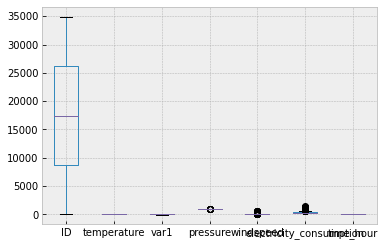

In [ ]:
plt.style.use('bmh')

# plotting outliers for the numeric columns
#
_t, cols = pd.DataFrame.boxplot(numeric, return_type='both')

outliers = [flier.get_ydata() for flier in cols['fliers']]
out_list = [i.tolist() for i in outliers]

print(f" Ourtliers:\n {out_list}")

> We have outliers in all the variables with electricity consumtion variable having the largest number of outliers.

In [ ]:
col = data.columns.tolist()

In [ ]:
 
def boxplots_by_class(df, list_of_X, y='electricity_consumption'):
    plt.rcParams['figure.figsize']=(10,5)
    f, ax = plt.subplots(1,len(list_of_X))
    for i in range(len(list_of_X)):
        sns.boxplot(y, y=list_of_X[i], data=df, ax=ax[i], palette='coolwarm')
    f.tight_layout()

ValueError: ignored

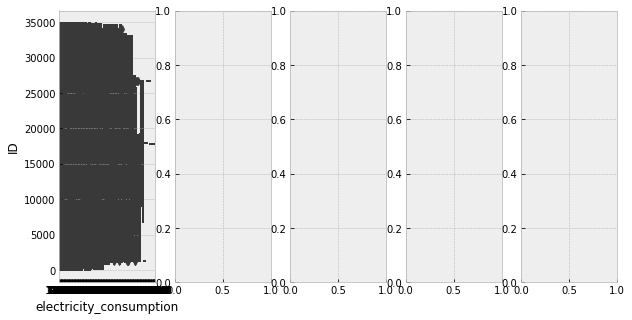

In [ ]:

boxplots_by_class(df=numeric, list_of_X=col[:5])

In [ ]:
# Function for counting number of outliers in our data columns and cheking the percentage for each
# ----
#
def detect_outlier(data):
    outliers=[]
    threshold=3
    mean_1 = np.mean(data)
    std_1 =np.std(data)
    
    for y in data:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [ ]:
# Counting number of outliers in our data columns and cheking the percentage for each column using z-score
#
#
for col in numeric:
    rows, columns = numeric.shape
    percent_coefficient = float(100 / rows)
    outliers = detect_outlier(numeric[col])
    outliers_count = len(outliers)
    outliers_percentage = outliers_count * percent_coefficient
    print(f"{col} has {outliers_count} outliers in total, which is {outliers_percentage:.2}% of data")

ID has 0 outliers in total, which is 0.0% of data
temperature has 0 outliers in total, which is 0.0% of data
var1 has 0 outliers in total, which is 0.0% of data
pressure has 3 outliers in total, which is 0.011% of data
windspeed has 712 outliers in total, which is 2.7% of data
electricity_consumption has 489 outliers in total, which is 1.8% of data
time_hour has 0 outliers in total, which is 0.0% of data


In [ ]:
# Getting ouliers from our dataframe using a z-test
#
from scipy import stats

z = np.abs(stats.zscore(numeric))
print(z)

# Dropping and Confirming that our outliers have been dropped from the dataset.
#
df_o = numeric[(z < 3).all(axis=1)]

print(f"Previous dataframe size : {numeric.shape[0]}")
print(f"New dataframe size: {df_o.shape[0]}")

[[ 1.72439467  1.90021483  1.45652349 ... 11.34955972  0.76245818
   1.66132477]
 [ 1.72429588  1.98083494  1.66756148 ... 11.41439067  0.81800421
   1.51686175]
 [ 1.72419709  2.07297222  1.73470993 ... 11.4847105   0.67913913
   1.37239873]
 ...
 [ 1.72261649  0.74849887  1.05363279 ...  0.77289768  0.79023119
   1.37239873]
 [ 1.72271527  0.92125627  0.90974326 ...  0.89582793  0.81800421
   1.51686175]
 [ 1.72281406  0.82911899  0.90974326 ...  0.99255653  0.81800421
   1.66132477]]
Previous dataframe size : 26496
New dataframe size: 25294


# Exploratory Data Analysis.

> Indented block



### Visualization


#### Correlation

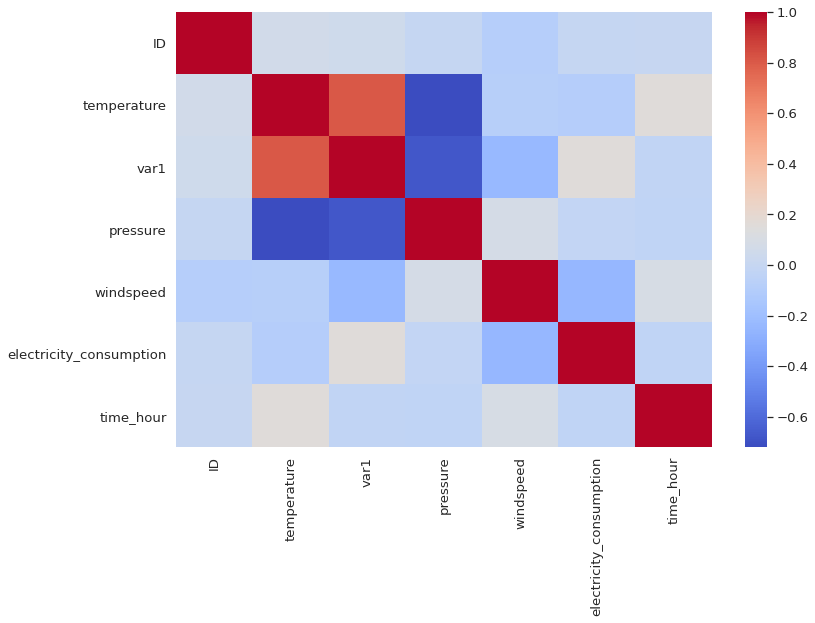

In [ ]:

plt.rcParams['figure.figsize']=(12,8)
sns.set(font_scale=1.2)
sns.heatmap(df_o.corr(), cmap='coolwarm');

**Temperature VS Electricity Consumption compared to Var1 VS Electricity Consumption**

**Histograms by class**

In [ ]:
# Draw Histogram plots of Numeric columns.
#
def hist_by_class(df, list_of_X, y='var2'):
    sns.set(rc={'figure.figsize':(15.7,10.27)})

    
    for i in range(len(list_of_X)):
#         g = s.FacetGrid(df, col=y, hue=y)
        g = sns.FacetGrid(data, hue=y)
        g.map(sns.distplot, list_of_X[i], hist=True, rug=False).add_legend()

In [ ]:
hist_by_class(df_o, list_of_X=col[:3])

In [ ]:
fig = px.line(data, x='date', y='electricity_consumption', color='var2')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(data, x='date', y='temperature', color='var2')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(data, x='date', y='pressure', color='var2')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
fig = px.line(data, x='date', y='windspeed', color='var2')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
# Drawing frequency tables for the categorical variale
#
for col in category:
    print(data[col].value_counts())
    print("\n")

2014-12-15 11:00:00    1
2014-07-10 09:00:00    1
2016-01-01 15:00:00    1
2017-05-04 10:00:00    1
2017-04-03 04:00:00    1
                      ..
2015-08-04 02:00:00    1
2016-10-23 20:00:00    1
2015-10-04 22:00:00    1
2013-07-14 13:00:00    1
2013-12-16 00:00:00    1
Name: datetime, Length: 26496, dtype: int64


A    25239
C     1040
B      217
Name: var2, dtype: int64


2016-12-09    24
2016-02-13    24
2015-07-07    24
2015-11-01    24
2017-06-06    24
              ..
2013-09-18    24
2014-05-01    24
2013-08-16    24
2015-02-19    24
2016-03-08    24
Name: date, Length: 1104, dtype: int64


00:00:00    1104
17:00:00    1104
22:00:00    1104
18:00:00    1104
10:00:00    1104
14:00:00    1104
02:00:00    1104
20:00:00    1104
12:00:00    1104
13:00:00    1104
04:00:00    1104
23:00:00    1104
06:00:00    1104
05:00:00    1104
16:00:00    1104
09:00:00    1104
08:00:00    1104
01:00:00    1104
15:00:00    1104
07:00:00    1104
21:00:00    1104
03:00:00    1104
19:00:00    1104


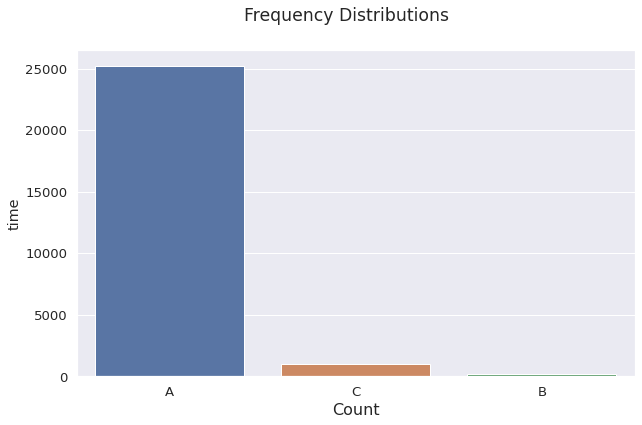

In [ ]:
# Plotting sublots for our categorical variables.
#
fig, (ax) = plt.subplots(figsize=(10, 6))
fig.suptitle('Frequency Distributions')

sns.barplot(data['var2'].value_counts().keys(), data['var2'].value_counts(), ax=ax)
plt.ylabel(col)
plt.xlabel('Count', fontsize=16)
      
plt.show()

In [ ]:

fig = px.line(data, x='date', y='electricity_consumption', range_x=['2017-01-01','2017-07-31'], color='var2')
fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:

fig = px.line(data, x='date', y='electricity_consumption', title='Time Series with Range Slider and Selectors')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(count=1, label="1m", step="month", stepmode="backward"),
            dict(count=6, label="6m", step="month", stepmode="backward"),
            dict(count=1, label="YTD", step="year", stepmode="todate"),
            dict(count=1, label="1y", step="year", stepmode="backward"),
            dict(step="all")
        ])
    )
)
fig.show()

In [ ]:
fig = go.Figure(go.Scatter(
    x = data['datetime'],
    y = data['electricity_consumption']
))

fig.update_xaxes(
    rangeslider_visible=True,
    tickformatstops = [
        dict(dtickrange=[None, 1000], value="%H:%M:%S.%L ms"),
        dict(dtickrange=[1000, 60000], value="%H:%M:%S s"),
        dict(dtickrange=[60000, 3600000], value="%H:%M m"),
        dict(dtickrange=[3600000, 86400000], value="%H:%M h"),
        dict(dtickrange=[86400000, 604800000], value="%e. %b d"),
        dict(dtickrange=[604800000, "M1"], value="%e. %b w"),
        dict(dtickrange=["M1", "M12"], value="%b '%y M"),
        dict(dtickrange=["M12", None], value="%Y Y")
    ]
)

fig.show()